# Cats vs Dogs Classification

In [1]:
import cv2
import os
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt

### Preprocessing; images to arrays

In [14]:
def preprocess_images(directory):
    X1=[]
    y1=[]
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"): 
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.resize(img, (50,50))
            X = np.array(img).flatten()
            label = 0 if "cat." in filename else 1
            y = np.array(label)
            X1.append(X)
            y1.append(y)
    return X1,y1

# Path to your dataset directory
data_dir = 'D:\\prodigy\\task 3\\dogs-vs-cats\\train\\train'


In [28]:
X,y = preprocess_images(data_dir)
X=np.array(X)
y=np.array(y)
print("Image into array:",X)
print("corresponding labels:",y)

Image into array: [[ 92 169 208 ...   0   2   2]
 [ 42  43  39 ...  20  26  39]
 [ 53  45  38 ...  10 183 187]
 ...
 [159 173 191 ... 102 116 134]
 [ 43  94  66 ...  58 110  87]
 [153 145 142 ... 181 176 212]]
corresponding labels: [0 0 0 ... 1 1 1]


In [16]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

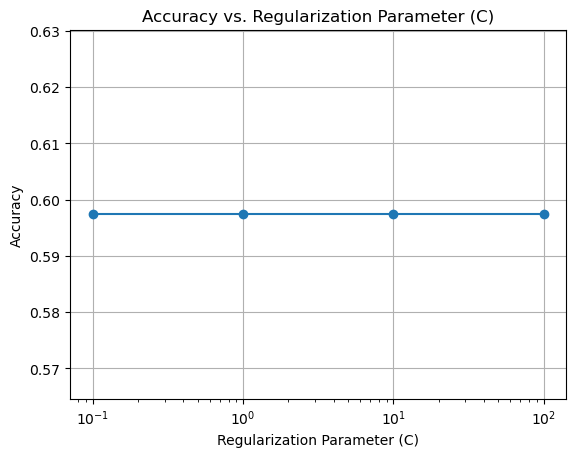

In [29]:
accuracy_values = []
C_values = [0.1, 1, 10, 100] 
for C in C_values:
    model = svm.SVC(kernel='poly', C=C, gamma='auto')
    model.fit(X_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(C_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Regularization Parameter (C)')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log') 
plt.grid(True)
plt.show()

Prediction is: Dog


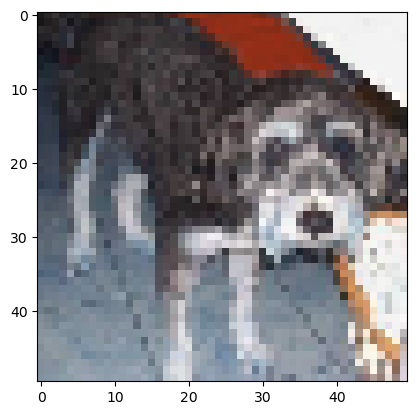

In [27]:
categories=["Cat","Dog"]
print("Prediction is:",categories[y_pred[4]])
plot = x_test[4].reshape(50, 50, 3) 
plt.imshow(plot)
plt.show()